<a href="https://colab.research.google.com/github/Rafiprabowo/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok 1 :**


# **1.   Alfina Salsabilla 2141720044**
# **2.   M. Rafi Prabowo 2141720239**
# **3. Syaikhul Syafwan R 2141720105**






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Import File**

In [ ]:
def pathProcessing (path):
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif']  # Add more extensions if needed
    image_paths = []

    for ext in image_extensions:
        image_paths.extend(glob.glob(os.path.join(path, ext)))

    return image_paths

In [ ]:
def readImage (paths):
    images=[]

    for path in paths:
        image= cv2.imread(path,0)
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to read image at path: {path}")

    return images

In [ ]:
def show_images(images, num_cols=3):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 8))  # Atur ukuran figur sesuai kebutuhan

    for i, image in enumerate(images, 1):
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image, cmap='gray')  # Menggunakan cmap='gray' jika gambar dalam mode grayscale
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# **Pre Procesing**

In [ ]:
def gaussianBlur(images):
    blurredImages=[]
    for image in images:
        kernel_size = (5, 5)
        sigma_x = 0
        blurredImage = cv2.GaussianBlur(image, kernel_size, sigma_x)
        blurredImages.append(blurredImage)

    return blurredImages

In [ ]:
def histogramEqualizing(images):
    equalizedImages=[]
    for image in images:
        equalizedImage = cv2.equalizeHist(image)
        equalizedImages.append(equalizedImage)

    return equalizedImages

In [ ]:
def contourDetect(images):
    cleanImages=[]
    for image in images:
        _, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Choose the contour with the largest area
        largest_contour = max(contours, key=cv2.contourArea)

        # Create a mask to extract the necessary part
        mask = np.zeros_like(image)
        cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

        result = cv2.bitwise_and(image, image, mask=mask)

        cleanImages.append(result)

    return cleanImages

In [ ]:
def erode(images):

    erodedImages=[]
    for image in images:
        kernel = (5, 5)
        erodedImage  = cv2.erode(image, kernel, iterations=1)
        erodedImages.append(erodedImage)

    return erodedImages

In [ ]:
def main ():
    folderPath= 'KTP'
    paths=pathProcessing(folderPath)
    images= readImage(paths)

    images= gaussianBlur(images)
    images= erode(images)
    show_images(images)

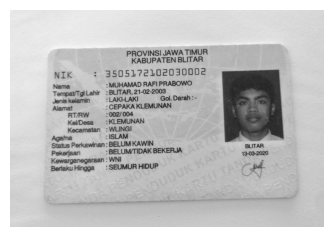

In [ ]:
folderPath= '/content/drive/MyDrive/PCVK/Kuis 2/KTP'
paths=pathProcessing(folderPath)
images= readImage(paths)
show_images(images)

In [ ]:
main()

<Figure size 1000x800 with 0 Axes>

# **Lokalisasi**

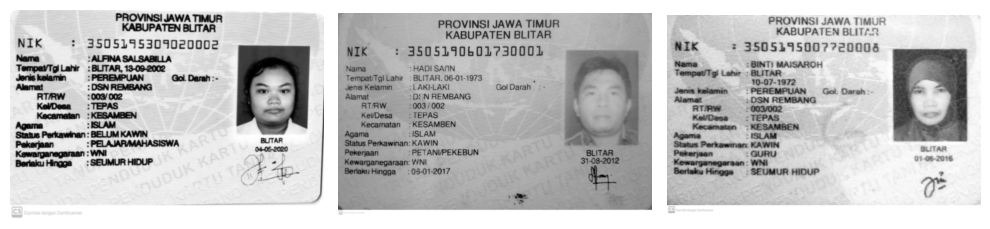

In [ ]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pathProcessing(path):
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif']  # Add more extensions if needed
    image_paths = []

    for ext in image_extensions:
        image_paths.extend(glob.glob(os.path.join(path, ext)))

    return image_paths

def readImage(paths):
    images = []

    for path in paths:
        image = cv2.imread(path, 0)
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to read image at path: {path}")

    return images

def show_images(images, num_cols=3):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    for i, image in enumerate(images, 1):
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image, cmap='gray')  # Use cmap='gray' if the image is in grayscale mode
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def gaussianBlur(images):
    blurredImages = []
    for image in images:
        kernel_size = (5, 5)
        sigma_x = 0
        blurredImage = cv2.GaussianBlur(image, kernel_size, sigma_x)
        blurredImages.append(blurredImage)

    return blurredImages

def histogramEqualizing(images):
    equalizedImages = []
    for image in images:
        equalizedImage = cv2.equalizeHist(image)
        equalizedImages.append(equalizedImage)

    return equalizedImages

def contourDetect(images):
    cleanImages = []
    for image in images:
        _, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Choose the contour with the largest area
        largest_contour = max(contours, key=cv2.contourArea)

        # Create a mask to extract the necessary part
        mask = np.zeros_like(image)
        cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

        result = cv2.bitwise_and(image, image, mask=mask)

        cleanImages.append(result)

    return cleanImages

def erode(images):
    erodedImages = []
    for image in images:
        kernel = (5, 5)
        erodedImage  = cv2.erode(image, kernel, iterations=1)
        erodedImages.append(erodedImage)

    return erodedImages

def localizeKTP(images):
    localizedImages = []
    for image in images:
        # Find contours
        contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Choose the contour with the largest area
        largest_contour = max(contours, key=cv2.contourArea)

        # Create a bounding box around the contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Extract the region of interest (ROI)
        localizedImage = image[y:y+h, x:x+w]

        localizedImages.append(localizedImage)

    return localizedImages

def main():
    folderPath = '/content/drive/MyDrive/PCVK/Kuis 2/KTP'
    paths = pathProcessing(folderPath)
    images = readImage(paths)

    # Preprocessing
    images = gaussianBlur(images)
    images = erode(images)

    # Localization
    localized_images = localizeKTP(images)
    show_images(localized_images)

main()


# **Segmentasi**

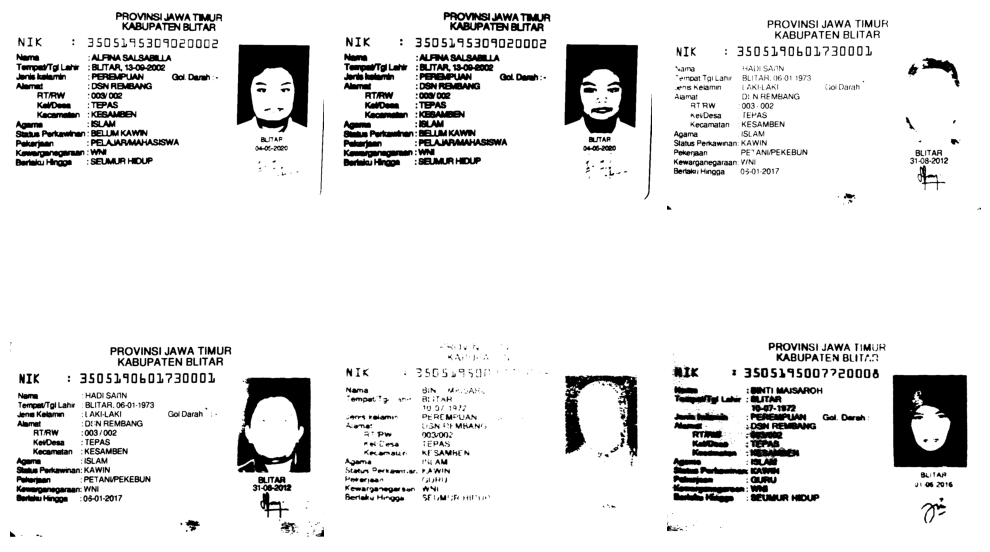

In [ ]:
def threshold_segment(image):
    _, segmented = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
    return segmented

def clustering_segment(image):
    reshaped_image = image.reshape((-1, 1))
    reshaped_image = np.float32(reshaped_image)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2

    _, labels, centers = cv2.kmeans(reshaped_image, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    segmented = np.uint8(centers[labels.flatten()])

    segmented = segmented.reshape(image.shape)

    return segmented

def segment(images):
    segmentedImages = []

    for image in images:
        # Apply thresholding segmentation
        thresholded_segmented = threshold_segment(image)
        segmentedImages.append(thresholded_segmented)

        # Apply clustering segmentation
        clustering_segmented = clustering_segment(image)
        segmentedImages.append(clustering_segmented)

    return segmentedImages

def main():
    folderPath = '/content/drive/MyDrive/PCVK/Kuis 2/KTP'
    paths = pathProcessing(folderPath)
    images = readImage(paths)

    # Preprocessing
    images = gaussianBlur(images)
    images = erode(images)

    # Localization
    localized_images = localizeKTP(images)

    # Segmentation
    segmented_images = segment(localized_images)

    # Display segmented images
    show_images(segmented_images)

main()


# **Face Detection**

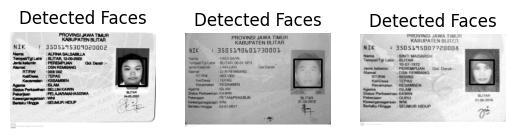

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def pathProcessing(folderPath):
    paths = []
    for filename in os.listdir(folderPath):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            paths.append(os.path.join(folderPath, filename))
    return paths

def readImage(paths):
    images = []
    for path in paths:
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        images.append(image)
    return images

def show_images(images, titles):
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

def faceDetection(images):
    detectedImages = []
    for image in images.copy():
        # Perform face detection
        faces = face_cascade.detectMultiScale(image, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

        # Draw rectangles around the detected faces (with green color)
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 15)

        detectedImages.append(image)

    return detectedImages

def main():
    folderPath = '/content/drive/MyDrive/PCVK/Kuis 2/KTP'
    paths = pathProcessing(folderPath)
    original_images = readImage(paths)

    # Face Detection on Original Images
    detected_images = faceDetection(original_images)

    # Display Detected Images
    show_images(detected_images, titles=['Detected Faces']*len(detected_images))

if __name__ == "__main__":
    main()
